# HR Employees Data Analysis
**Below are all the features in the dataset:**
- Age: The age of the employee;
- Attrition: Whether the employee has left the company or not;
- BusinessTravel: The frequency of business travel;
- DailyRate: The employee’s daily rate of pay;
- Department: The department in which the employee works;
- DistanceFromHome: The distance between the employee’s home and workplace;
- Education: The highest level of education attained by the employee;
- EducationField: The field in which the employee’s education is focused;
- EmployeeCount: A count of the employees in the company;
- EmployeeNumber: A unique identifier for each employee;
- EnvironmentSatisfaction: The employee’s level of satisfaction with their work environment;
- Gender: The employee’s gender;
- HourlyRate: The employee’s hourly rate of pay;
- JobInvolvement: The employee’s level of involvement in their job;
- JobLevel: The level of the employee’s job within the company;
- JobRole: The employee’s job role;
- JobSatisfaction: The employee’s level of satisfaction with their job;
- MaritalStatus: The employee’s marital status;
- MonthlyIncome: The employee’s monthly income;
- MonthlyRate: The employee’s monthly rate of pay;
- NumCompaniesWorked: The number of companies the employee has worked for in the past;
- Over18: Whether the employee is over 18 years old or not;
- OverTime: Whether the employee works overtime or not;
- PercentSalaryHike: The percentage increase in the employee’s salary from the previous year;
- PerformanceRating: The employee’s performance rating;
- RelationshipSatisfaction: The employee’s level of satisfaction with their relationships at work;
- StandardHours: The standard number of working hours per day;
- StockOptionLevel: The employee’s stock option level;
- TotalWorkingYears: The employee’s total number of years working;
- TrainingTimeLastYear: The number of hours the employee spent on training last year;
- WorkLifeBalance: The employee’s level of balance between work and personal life;
- YearsAtCompany: The number of years the employee has been working for the company;
- YearsInCurrentRole: Number of years in the current role;
- YearsSinceLastPromotion: Number of years since last promotion;
- YearsWithCurrManager: Number of years with the current manager;

Use this data to do exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work) and their attrition status to develop a predictive model that can identify which employees are most likely to leave the company.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# url = 'https://raw.githubusercontent.com/bkget/DS-with-AI-in-Python/cf35570d3ab6595ab73e6ac37641b98a60fa993c/HR_analytics/data/WA_Fn-UseC_-HR-Employee-Attrition.csv'
url = 'data/WA_Fn-UseC_-HR-Employee-Attrition.csv'
df = pd.read_csv(url)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Analysis

In [12]:
df.shape

(1470, 35)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [16]:
print([col for col in df.columns if df[col].isnull().sum() > 0])

[]


In [17]:
df.duplicated().sum()

0

The dataset have no null valued and duplicated rows in any of its columns.

In [18]:
df.nunique()

,0
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


## Data Insights - Analytics

In [19]:
df['Attrition'].value_counts()

,count
Attrition,
No,1233
Yes,237


In [20]:
pd.crosstab(df['Gender'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
Gender,,
Female,85.204082,14.795918
Male,82.993197,17.006803


<Axes: xlabel='Gender'>

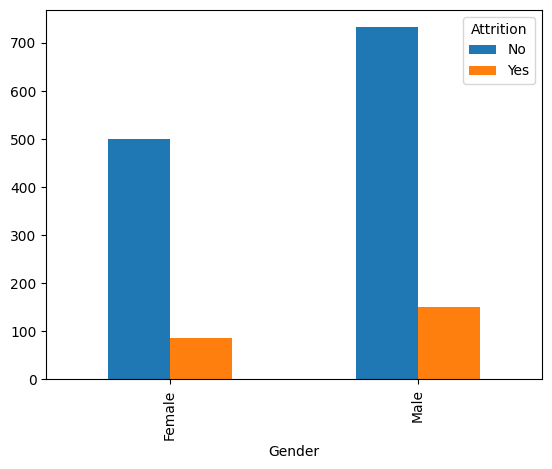

In [21]:
pd.crosstab(df['Gender'], df['Attrition']).plot(kind='bar')

In [22]:
pd.crosstab(df['Education'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
Education,,
1,81.764706,18.235294
2,84.397163,15.602837
3,82.692308,17.307692
4,85.427136,14.572864
5,89.583333,10.416667


<Axes: xlabel='Education'>

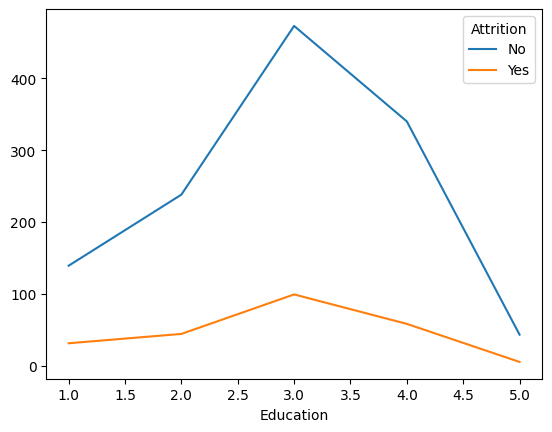

In [23]:
pd.crosstab(df['Education'], df['Attrition']).plot(kind='line')

In [24]:
pd.crosstab(df['Department'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


<Axes: ylabel='Department'>

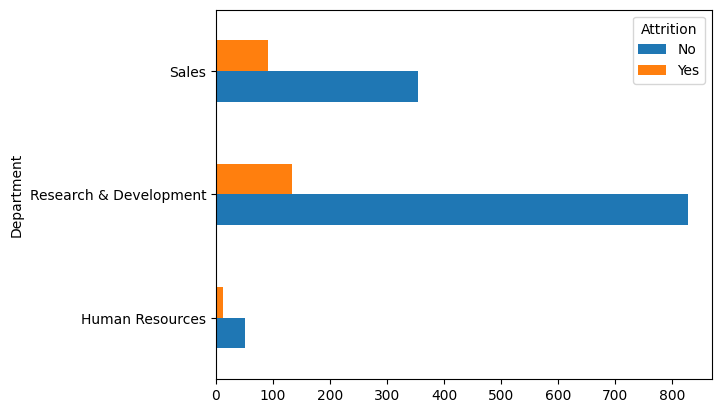

In [25]:
pd.crosstab(df['Department'], df['Attrition']).plot(kind='barh')

In [26]:
pd.crosstab(df['OverTime'], df['Attrition'])

Attrition,No,Yes
OverTime,,
No,944,110
Yes,289,127


<Axes: xlabel='OverTime'>

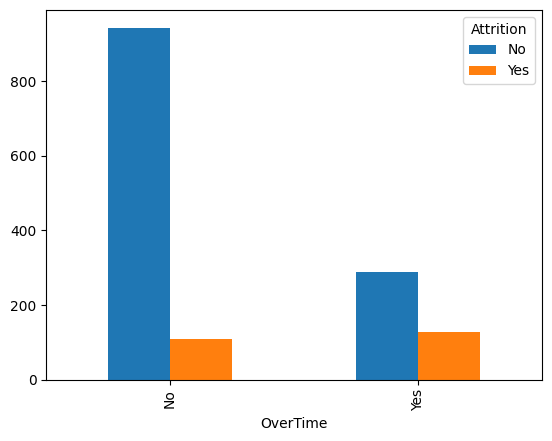

In [27]:
pd.crosstab(df['OverTime'], df['Attrition']).plot(kind='bar')

It looks employees who work overtime has leaving the company more.

In [28]:
pd.crosstab(df['PercentSalaryHike'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
PercentSalaryHike,,
11,80.476190,19.523810
12,83.333333,16.666667
13,83.732057,16.267943
14,88.059701,11.940299
15,82.178218,17.821782
16,82.051282,17.948718
17,82.926829,17.073171
18,85.393258,14.606742
19,88.157895,11.842105


<Axes: ylabel='PercentSalaryHike'>

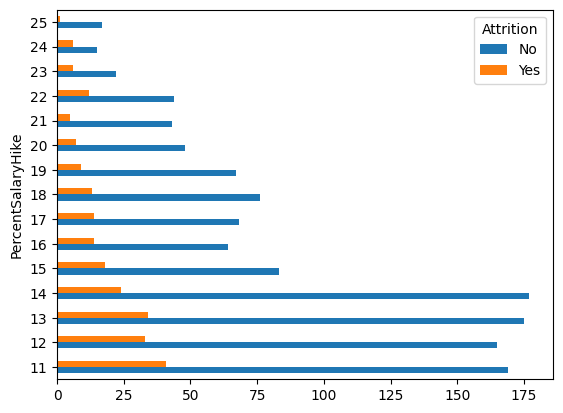

In [29]:
pd.crosstab(df['PercentSalaryHike'], df['Attrition']).plot(kind='barh')

In [30]:
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18-30', '31-40', '41-50', '51-60', '60+']

df['AgeGroup'] = pd.cut(df.Age, bins=age_bins, labels=age_labels)

In [31]:
pd.crosstab(df['AgeGroup'], df['Attrition'])

Attrition,No,Yes
AgeGroup,,
18-30,282,96
31-40,534,85
41-50,288,34
51-60,125,18


<Axes: xlabel='AgeGroup'>

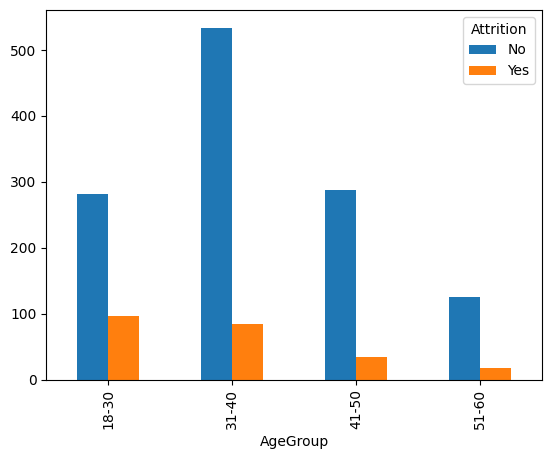

In [32]:
pd.crosstab(df['AgeGroup'], df['Attrition']).plot(kind='bar')

<Axes: xlabel='MaritalStatus'>

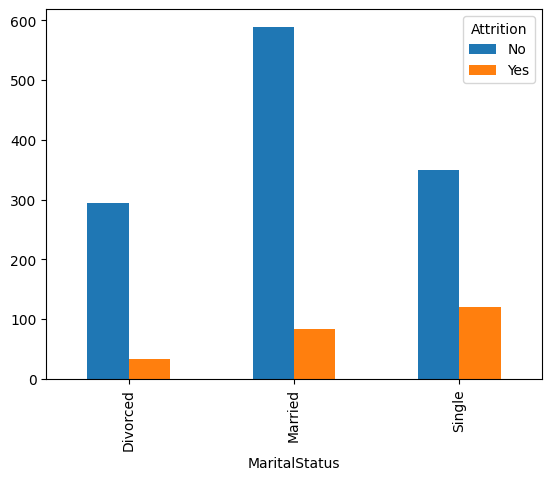

In [33]:
pd.crosstab(df['MaritalStatus'], df['Attrition']).plot(kind='bar')

In [34]:
pd.crosstab(df['Attrition'], [df['MaritalStatus'], df['Gender']])

MaritalStatus Divorced      Married      Single     
Gender          Female Male  Female Male Female Male
Attrition                                           
No                 108  186     241  348    152  198
Yes                  9   24      31   53     47   73

<Axes: ylabel='MaritalStatus,Gender'>

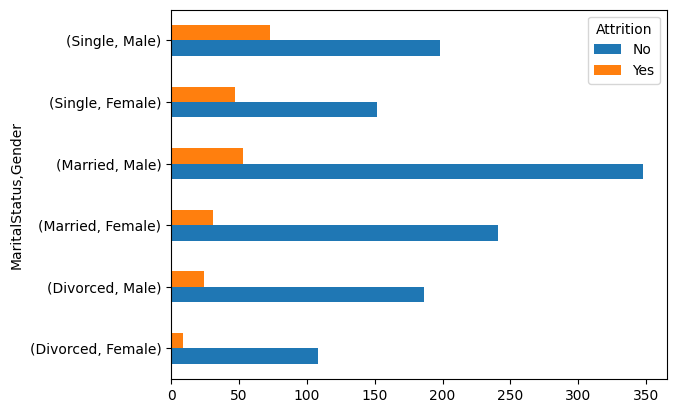

In [35]:
pd.crosstab([df['MaritalStatus'], df['Gender']], df['Attrition']).plot(kind='barh')

In [36]:
pd.crosstab([df['Department'], df['Gender']], df['Attrition'])

Attrition                       No  Yes
Department             Gender          
Human Resources        Female   14    6
                       Male     37    6
Research & Development Female  336   43
                       Male    492   90
Sales                  Female  151   38
                       Male    203   54

In [37]:
df['MonthlyIncome'].min(), df['MonthlyIncome'].max()

(1009, 19999)

In [38]:
bins = [0, 3000, 6000, 10000, 15000, 20000, float('inf')]  # Adding 'inf' for the highest range
labels = ['Low', 'Medium', 'High', 'Very High', 'Elite', 'Top Tier']

# Create the income category based on MonthlyIncome
df['IncomeCategory'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels)

In [39]:
pd.crosstab(df['IncomeCategory'], df['Attrition'], normalize='index') * 100

Attrition,No,Yes
IncomeCategory,,
Low,71.392405,28.607595
Medium,87.283237,12.716763
High,88.000000,12.000000
Very High,86.486486,13.513514
Elite,96.240602,3.759398


<Axes: ylabel='Gender,IncomeCategory'>

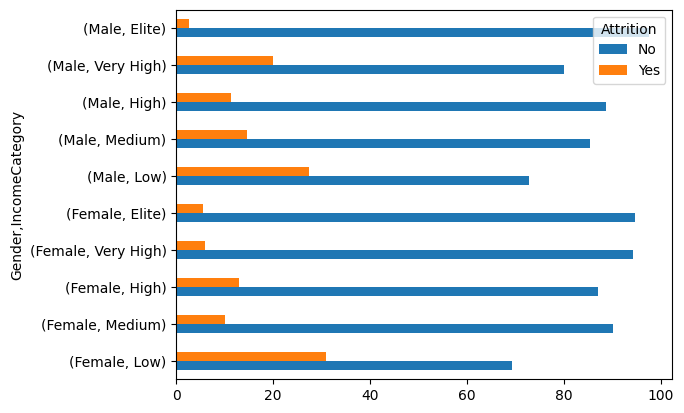

In [40]:
(pd.crosstab([df['Gender'], df['IncomeCategory']], df['Attrition'], normalize='index') * 100).plot(kind='barh')

In [41]:
pd.crosstab([df['MaritalStatus'], df['IncomeCategory']], df['Attrition'], normalize='index') * 100

Attrition                             No        Yes
MaritalStatus IncomeCategory                       
Divorced      Low              78.048780  21.951220
              Medium           93.220339   6.779661
              High             94.444444   5.555556
              Very High        90.476190   9.523810
              Elite           100.000000   0.000000
Married       Low              79.166667  20.833333
              Medium           91.025641   8.974359
              High             88.976378  11.023622
              Very High        84.931507  15.068493
              Elite            95.774648   4.225352
Single        Low              58.620690  41.379310
              Medium           77.844311  22.155689
              High             82.978723  17.021277
              Very High        84.848485  15.151515
              Elite            93.548387   6.451613

In [42]:
from sklearn.preprocessing import LabelEncoder

encoded_df = df.copy()
le = LabelEncoder()

# Label encode each object-type column
label_encoders = {}
for col in encoded_df.select_dtypes(include=['object', 'category']).columns:
    encoded_df[col] = le.fit_transform(encoded_df[col])
    label_encoders[col] = le  # Store encoder for future use if needed

In [43]:
encoded_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AgeGroup,IncomeCategory
0,41,1,2,1102,2,1,2,1,1,1,...,0,8,0,1,6,4,0,5,2,3
1,49,0,1,279,1,8,1,1,1,2,...,1,10,3,3,10,7,1,7,2,3
2,37,1,2,1373,1,2,2,4,1,4,...,0,7,3,3,0,0,0,0,1,2
3,33,0,1,1392,1,3,4,1,1,5,...,0,8,3,3,8,7,3,0,1,2
4,27,0,2,591,1,2,1,3,1,7,...,1,6,3,3,2,2,2,2,0,3


### Calculate Correlation Matrix

In [44]:
corr_matrix = encoded_df.corr()
target_column = 'Attrition'

# Get absolute correlations with the target column, sorted in descending order
target_corr = corr_matrix[target_column].abs().sort_values(ascending=False)
target_corr = target_corr[target_corr.index != target_column]
# Select top features with the strongest correlations
top_features = target_corr[target_corr > 0.1]

print("Top predictive features for the target column:\n", top_features)

Top predictive features for the target column:
 OverTime                   0.246118
TotalWorkingYears          0.171063
JobLevel                   0.169105
MaritalStatus              0.162070
YearsInCurrentRole         0.160545
MonthlyIncome              0.159840
Age                        0.159205
YearsWithCurrManager       0.156199
StockOptionLevel           0.137145
YearsAtCompany             0.134392
JobInvolvement             0.130016
AgeGroup                   0.108091
JobSatisfaction            0.103481
EnvironmentSatisfaction    0.103369
Name: Attrition, dtype: float64


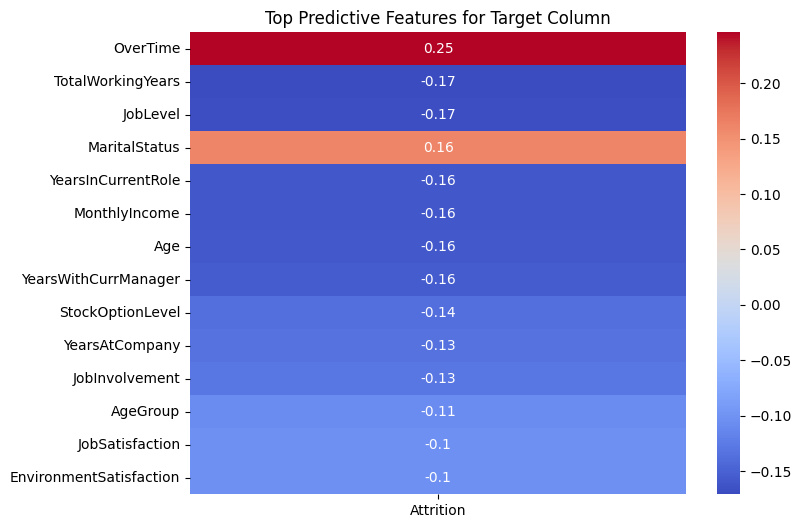

In [45]:
# Visualize the top features as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.loc[top_features.index, [target_column]], annot=True, cmap="coolwarm")
plt.title("Top Predictive Features for Target Column")
plt.show()
